<a href="https://colab.research.google.com/github/hitesha14/Rising2021_Timeseries/blob/main/Copy_of_Time_Series_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import urllib library
from urllib.request import urlopen
# import json
import json
url = "https://api.covid19india.org/v4/min/timeseries.min.json"
  
response = urlopen(url)

data_json = json.loads(response.read())

print(type(data_json))

In [ ]:
data_json.keys()

In [ ]:
df = data_json['AN']
df['dates']

In [ ]:
df['dates'] =  pd.to_datetime(df['dates'], format='%Y%m%d')

In [ ]:
data = [{'date': x['date'], 'values': eval(x['values'])} for x in data_json['AN']['dates']]
pd.DataFrame(data).explode('values')

In [ ]:
for i in data_json['AN']:
  data_json['AN']['dates'] =  pd.to_datetime(data_json['AN']['dates'], format='%Y%m%d')
  print(i)

In [ ]:
!pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = data_json['AN']
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [ ]:
import pandas as pd
data = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [ ]:
data.keys()

Index(['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed',
       'Daily Recovered', 'Total Recovered', 'Daily Deceased',
       'Total Deceased'],
      dtype='object')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    mode = "lines+markers",
    y = data['Daily Confirmed'],
    x = data['Date']))

fig.update_xaxes(
        tickangle = 90,
        title_text = "Month",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "Temperature",
        title_standoff = 25)

fig.show()

      Date_YMD  Daily Confirmed
200 2020-08-17            54298
201 2020-08-18            65024
202 2020-08-19            69196
203 2020-08-20            68518
204 2020-08-21            69029
..         ...              ...
295 2020-11-20            46283
296 2020-11-21            45301
297 2020-11-22            44404
298 2020-11-23            37441
299 2020-11-24            44245

[100 rows x 2 columns]


Text(0.5, 0.98, 'Temperature Decomposition')

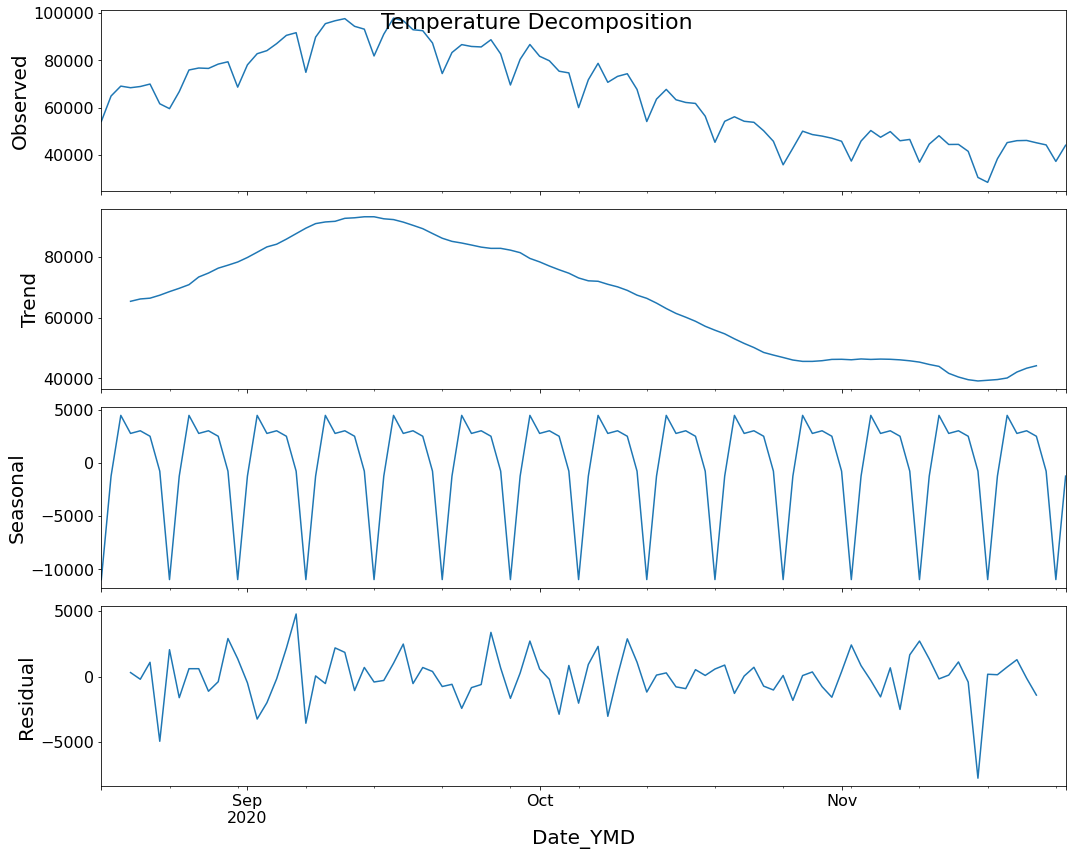

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
data = data[200:300]
data['Date_YMD'] =  pd.to_datetime(data['Date_YMD'])
y = data[['Date_YMD','Daily Confirmed']]
print(y)
y = y.set_index('Date_YMD')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd


def ts_decompose(ts, freq):

    decomposition = seasonal_decompose(ts.values, model="additive", freq=freq)

    trend = pd.DataFrame(decomposition.trend).dropna().values
    seasonal = pd.DataFrame(decomposition.seasonal).dropna().values
    residual = pd.DataFrame(decomposition.resid).dropna().values
    trend = trend.astype('float32').reshape(-1, 1)
    seasonal = seasonal[freq//2:-(freq//2)].astype('float32').reshape(-1, 1)
    # for unify the scale, drop the head and tail of season series
    residual = residual.astype('float32').reshape(-1, 1)

    return trend, seasonal, residual